In [1]:
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.example_data import load_ecoli_data
from pymodulon.plotting import *
import pymodulon
from pymodulon.enrichment import *

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
from matplotlib import cm
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.patches import Patch
from matplotlib.patches import Circle
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings('ignore')

# import venn

# Differential iModulon Activity (DiMA) analysis

In [4]:
trp_ica_data = load_json_model("../data/ica_data/trp_sd_ica_data.json")
trp_ica_data_self_centered = load_json_model("../data/ica_data/trp_sd_ica_data_self_centered.json")
combined_ica_data = load_json_model("../data/ica_data/trp_sd_ica_data_combined.json")

In [3]:
def get_systems_category_group_dict(iMs):
    df = ica_data.imodulon_table.system_category.loc[iMs]
    df = df.sort_values(ascending=True)
    my_dict = df.to_dict()
    return my_dict

In [7]:
sample_table = trp_ica_data.sample_table.copy()
sample_table[sample_table["process_condition"] == "control"]

,LibraryLayout,Platform,Run,R1,R2,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation,project,condition,strain_ID,process_condition,experiment_run,strain_name,reference_condition,skip,full_name,passed_replicate_correlations
PD_117_R11,PAIRED,DNBSEQ,NaN,PD_117_R11_S05#_1.fq.gz,PD_117_R11_S05#_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_control,HMP3071,control,DDB_117,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_control,True
PD_117_R12,PAIRED,DNBSEQ,NaN,PD_117_R12_S05#_1.fq.gz,PD_117_R12_S05#_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_control,HMP3071,control,DDB_117,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_control,True
PD_117_R13,PAIRED,DNBSEQ,NaN,PD_117_R13_S05#_1.fq.gz,PD_117_R13_S05#_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_control,HMP3071,control,DDB_117,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_control,True
PD_126_R5,PAIRED,DNBSEQ,NaN,PD_126_R5_S1_1.fq.gz,PD_126_R5_S1_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_control,HMP3071,control,DDB_126,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_control,True
PD_126_R6,PAIRED,DNBSEQ,NaN,PD_126_R6_S1_1.fq.gz,PD_126_R6_S1_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_control,HMP3071,control,DDB_126,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_control,True
PD_126_R7,PAIRED,DNBSEQ,NaN,PD_126_R7_S1_1.fq.gz,PD_126_R7_S1_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_control,HMP3071,control,DDB_126,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_control,True
PD_126_R11,PAIRED,DNBSEQ,NaN,PD_126_R11_S1_1.fq.gz,PD_126_R11_S1_2.fq.gz,True,True,True,Trp_scale-down,SDT714_control,SDT714,control,DDB_126,TP_del-fliA,HMP3071_control,NaN,Trp_scale-down:SDT714_control,True
PD_126_R12,PAIRED,DNBSEQ,NaN,PD_126_R12_S1_1.fq.gz,PD_126_R12_S1_2.fq.gz,True,True,True,Trp_scale-down,SDT714_control,SDT714,control,DDB_126,TP_del-fliA,HMP3071_control,NaN,Trp_scale-down:SDT714_control,True
PD_126_R13,PAIRED,DNBSEQ,NaN,PD_126_R13_S1_1.fq.gz,PD_126_R13_S1_2.fq.gz,True,True,True,Trp_scale-down,SDT714_control,SDT714,control,DDB_126,TP_del-fliA,HMP3071_control,NaN,Trp_scale-down:SDT714_control,True


In [8]:
sample_table[sample_table["process_condition"] == "scale-down"]

,LibraryLayout,Platform,Run,R1,R2,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation,project,condition,strain_ID,process_condition,experiment_run,strain_name,reference_condition,skip,full_name,passed_replicate_correlations
PD_117_R14,PAIRED,DNBSEQ,NaN,PD_117_R14_S05#_1.fq.gz,PD_117_R14_S05#_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_scale-down,HMP3071,scale-down,DDB_117,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_scale-down,True
PD_117_R15,PAIRED,DNBSEQ,NaN,PD_117_R15_S05#_1.fq.gz,PD_117_R15_S05#_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_scale-down,HMP3071,scale-down,DDB_117,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_scale-down,True
PD_117_R16,PAIRED,DNBSEQ,NaN,PD_117_R16_S05#_1.fq.gz,PD_117_R16_S05#_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_scale-down,HMP3071,scale-down,DDB_117,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_scale-down,True
PD_126_R8,PAIRED,DNBSEQ,NaN,PD_126_R8_S1_1.fq.gz,PD_126_R8_S1_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_scale-down,HMP3071,scale-down,DDB_126,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_scale-down,True
PD_126_R9,PAIRED,DNBSEQ,NaN,PD_126_R9_S1_1.fq.gz,PD_126_R9_S1_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_scale-down,HMP3071,scale-down,DDB_126,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_scale-down,True
PD_126_R10,PAIRED,DNBSEQ,NaN,PD_126_R10_S1_1.fq.gz,PD_126_R10_S1_2.fq.gz,True,True,True,Trp_scale-down,HMP3071_scale-down,HMP3071,scale-down,DDB_126,TP,HMP3071_control,NaN,Trp_scale-down:HMP3071_scale-down,True
PD_126_R14,PAIRED,DNBSEQ,NaN,PD_126_R14_S1_1.fq.gz,PD_126_R14_S1_2.fq.gz,True,True,True,Trp_scale-down,SDT714_scale-down,SDT714,scale-down,DDB_126,TP_del-fliA,HMP3071_control,NaN,Trp_scale-down:SDT714_scale-down,True
PD_126_R15,PAIRED,DNBSEQ,NaN,PD_126_R15_S1_1.fq.gz,PD_126_R15_S1_2.fq.gz,True,True,True,Trp_scale-down,SDT714_scale-down,SDT714,scale-down,DDB_126,TP_del-fliA,HMP3071_control,NaN,Trp_scale-down:SDT714_scale-down,True
PD_126_R16,PAIRED,DNBSEQ,NaN,PD_126_R16_S1_1.fq.gz,PD_126_R16_S1_2.fq.gz,True,True,True,Trp_scale-down,SDT714_scale-down,SDT714,scale-down,DDB_126,TP_del-fliA,HMP3071_control,NaN,Trp_scale-down:SDT714_scale-down,True


In [12]:
PD_117_HMP_ctrl = ["PD_117_R11", "PD_117_R12", "PD_117_R13"]
PD_117_HMP_sd = ["PD_117_R14", "PD_117_R15", "PD_117_R16"]
PD_126_HMP_ctrl = ["PD_126_R5", "PD_126_R6", "PD_126_R7"]
PD_126_HMP_sd = ["PD_126_R8", "PD_126_R9", "PD_126_R10"]
PD_126_SDT_ctrl = ["PD_126_R11", "PD_126_R12", "PD_126_R13"]
PD_126_SDT_sd = ["PD_126_R14", "PD_126_R15", "PD_126_R16"]

## DiMA plots

### Strain vs strain

,difference,pvalue,qvalue,0,1
CP4-44,4.344868,2.589897e-01,0.827254,0.940931,5.285799
LPS,2.796697,6.892305e-07,0.000028,-6.390302,-3.593605
Arginine,-2.495637,4.156605e-01,0.827254,-4.841347,-7.336984


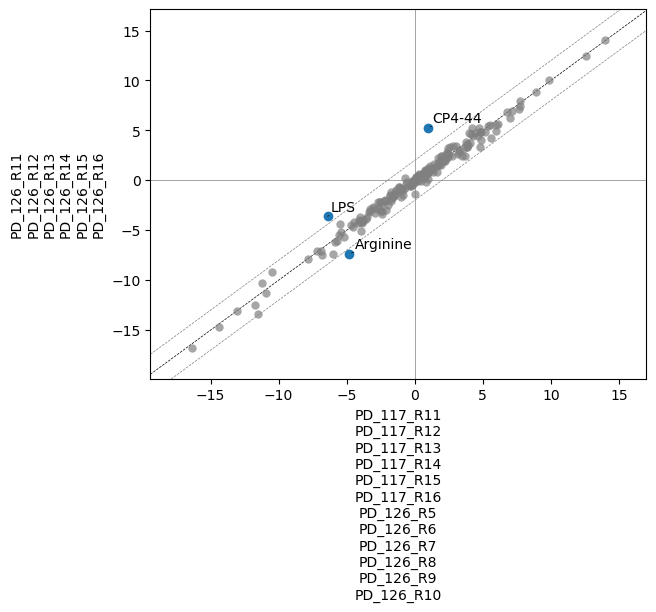

In [19]:
ax, table = plot_dima(
    trp_ica_data,
    PD_117_HMP_ctrl+PD_117_HMP_sd+PD_126_HMP_ctrl+PD_126_HMP_sd,
    PD_126_SDT_ctrl+PD_126_SDT_sd,
    fdr=1,
    threshold=2,
    line45_margin=2,
    table=True,
    label="auto"
)
table

,difference,pvalue,qvalue,0,1
CP4-44,4.362744,0.258856,1.0,0.923056,5.285799


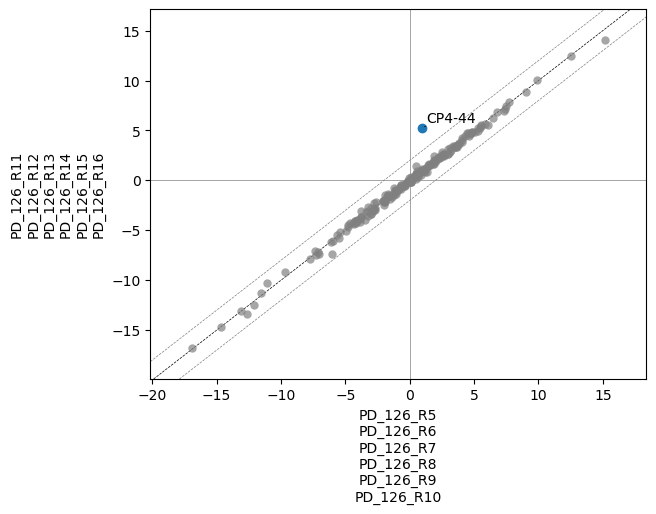

In [20]:
ax, table = plot_dima(
    trp_ica_data,
    PD_126_HMP_ctrl+PD_126_HMP_sd,
    PD_126_SDT_ctrl+PD_126_SDT_sd,
    fdr=1,
    threshold=2,
    line45_margin=2,
    table=True,
    label="auto"
)
table

### Experiment vs Experiment

,difference,pvalue,qvalue,0,1
Fnr-3,3.080561,0.361884,0.651516,4.040798,7.121359
Fnr-1,2.650272,0.323025,0.651516,3.499109,6.149382
Leu/Val/Ile,2.597023,0.375433,0.651516,-3.776506,-1.179483
Arginine,2.428016,0.417050,0.651516,-6.055355,-3.627339
Translation,2.301460,0.386467,0.651516,-12.667812,-10.366352
YgeV,2.209589,0.414698,0.651516,2.357380,4.566969
UC-5,2.157965,0.263201,0.651516,-1.031510,1.126455
GadXW,2.075798,0.441705,0.651516,-7.017010,-4.941212
cyoB/ndh/nuoB KO-2,2.059379,0.017936,0.173362,-0.178409,1.880970
Microaerobic,2.036900,0.165096,0.526734,2.646953,4.683854


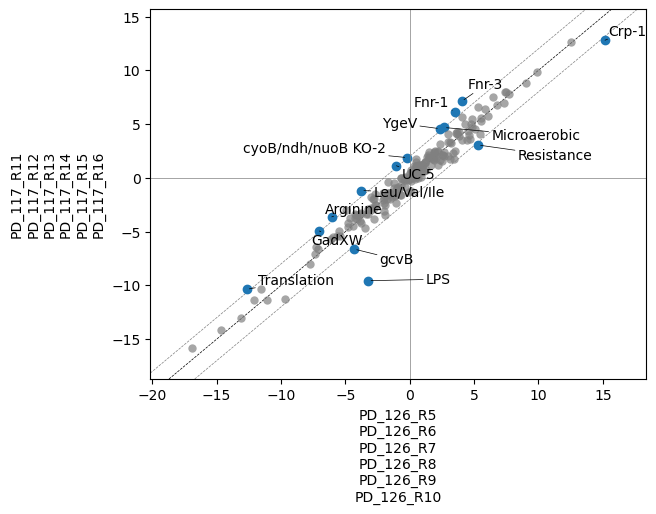

In [21]:
ax, table = plot_dima(
    trp_ica_data,
    PD_126_HMP_ctrl+PD_126_HMP_sd,
    PD_117_HMP_ctrl+PD_117_HMP_sd,
    fdr=1,
    threshold=2,
    line45_margin=2,
    table=True,
    label="auto"
)
table

### Scale-down vs control

,difference,pvalue,qvalue,0,1
Pyruvate-1,4.487804,0.000126,0.001584,2.530946,7.018750
Propionate,2.838280,0.012239,0.102503,11.168518,14.006797
Arginine,2.699578,0.411701,0.661463,-6.191136,-3.491558
Leu/Val/Ile,2.440680,0.378912,0.661463,-3.698334,-1.257655
Fnr-3,2.232590,0.380411,0.661463,4.464784,6.697373
DhaR,2.202341,0.326726,0.661463,-5.051187,-2.848846
RpoE,-2.092598,0.000000,0.000000,5.476736,3.384138
UC-3,-2.232549,0.023316,0.161602,4.895301,2.662752
UC-8,-2.806461,0.181062,0.544416,5.683441,2.876980
RpoS,-3.116603,0.034227,0.185934,-3.099364,-6.215967


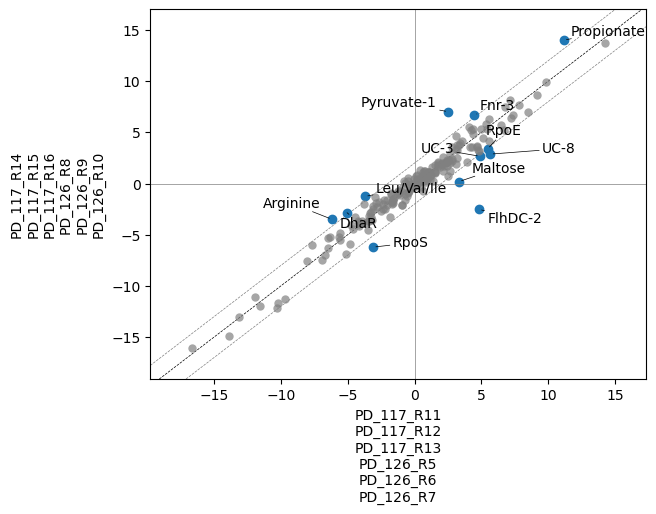

In [18]:
ax, table = plot_dima(
    trp_ica_data,
    PD_117_HMP_ctrl+PD_126_HMP_ctrl,
    PD_117_HMP_sd+PD_126_HMP_sd,
    fdr=1,
    threshold=2,
    line45_margin=2,
    table=True,
    label="auto"
)
table

,difference,pvalue,qvalue,0,1
Pyruvate-1,5.135612,0.000078,0.000825,2.134649,7.270261
Arginine,3.478943,0.399047,0.610148,-5.366810,-1.887867
Leu/Val/Ile,2.918559,0.368932,0.610148,-2.638762,0.279797
Fnr-3,2.891534,0.365500,0.610148,5.675592,8.567126
ppGpp,2.644785,0.396136,0.610148,-7.739467,-5.094682
Methionine,2.249834,0.434136,0.610148,-2.621576,-0.371743
Propionate,2.220498,0.013991,0.109468,11.557558,13.778056
DhaR,2.212619,0.326502,0.610148,-4.906510,-2.693891
Cold Shock,2.080853,0.000004,0.000055,3.033303,5.114157
RpoE,-2.136211,0.000000,0.000000,5.396027,3.259816


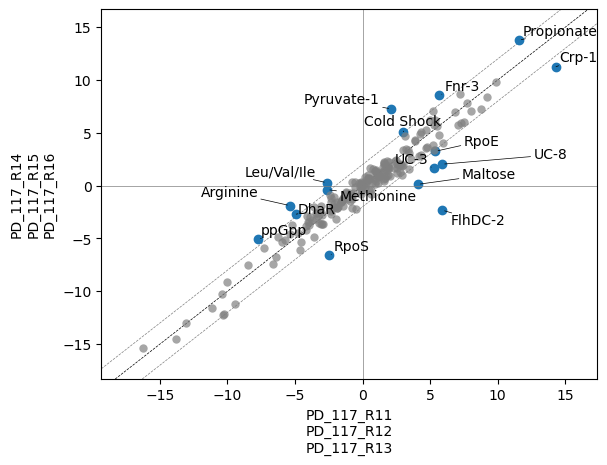

In [14]:
ax, table = plot_dima(
    trp_ica_data,
    PD_117_HMP_ctrl,
    PD_117_HMP_sd,
    fdr=1,
    threshold=2,
    line45_margin=2,
    table=True,
    label="auto"
)
table

,difference,pvalue,qvalue,0,1
Pyruvate-1,3.839997,0.000216,0.002893,2.927243,6.767240
Propionate,3.456062,0.010996,0.096093,10.779477,14.235538
DhaR,2.192062,0.326950,0.644473,-5.195863,-3.003801
RpoE,-2.048986,0.000000,0.000000,5.557446,3.508460
RpoS,-2.146740,0.039886,0.202510,-3.688585,-5.835326
Maltose,-2.307357,0.410335,0.644473,2.566489,0.259132
GadXW,-2.662267,0.426660,0.644473,-5.685876,-8.348143
FlhDC-2,-6.479959,0.002020,0.022555,3.752100,-2.727859


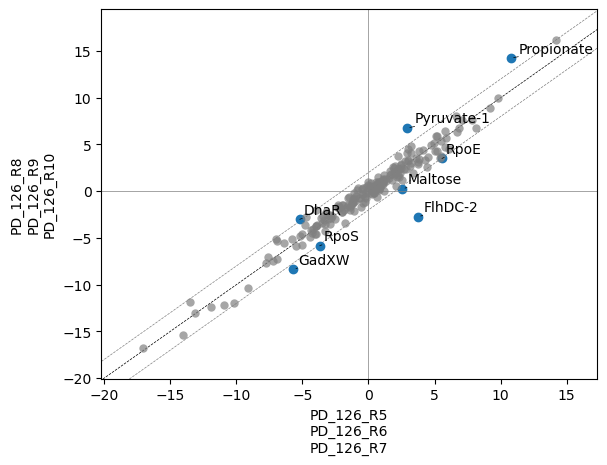

In [15]:
ax, table = plot_dima(
    trp_ica_data,
    PD_126_HMP_ctrl,
    PD_126_HMP_sd,
    fdr=1,
    threshold=2,
    line45_margin=2,
    table=True,
    label="auto"
)
table

,difference,pvalue,qvalue,0,1
Propionate,3.234485,0.011399,0.103674,10.863900,14.098385
Pyruvate-1,3.000058,0.000488,0.006544,3.353971,6.354029
Leu/Val/Ile,2.901991,0.369248,0.682086,-4.564920,-1.662929
DhaR,2.310227,0.324437,0.682086,-5.184006,-2.873780
RpoE,-2.111780,0.000000,0.000000,5.761510,3.649730
Fur-1,-2.132181,0.000000,0.000000,-9.199868,-11.332049
Maltose,-2.201016,0.412688,0.682086,2.664582,0.463566
Sulfate,-2.239300,0.014958,0.120266,6.073372,3.834072
GadXW,-2.548384,0.429278,0.682086,-6.139944,-8.688328
FlhDC-2,-7.309700,0.001035,0.011561,5.129413,-2.180287


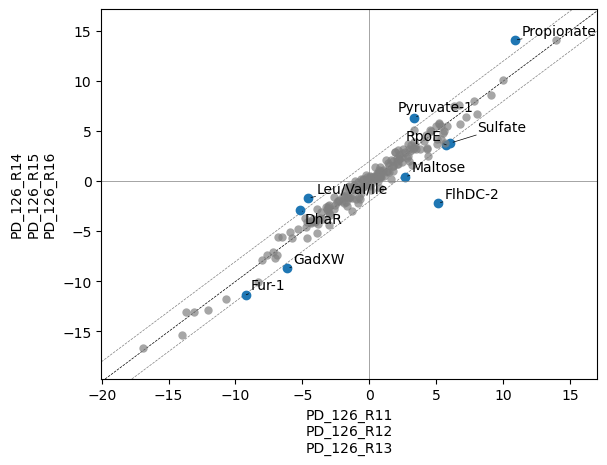

In [16]:
ax, table = plot_dima(
    trp_ica_data,
    PD_126_SDT_ctrl,
    PD_126_SDT_sd,
    fdr=1,
    threshold=2,
    line45_margin=2,
    table=True,
    label="auto"
)
table